<a href="https://colab.research.google.com/github/johannnamr/Discrepancy-based-inference-using-QMC/blob/main/Inference/Mv-g-and-k-distribution/mvgandk_times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate g-and-k distribution

Notebook for comparing MC and RQMC sampling

## Mount Drive

In [1]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following path has to be adjusted if necessary:

In [2]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

Define saving path (adjust if necessary):

In [3]:
path = '/content/drive/My Drive/Colab Notebooks/Paper/Inference/'

## Imports

In [4]:
import time

## Sampling

Set parameters:

In [5]:
np.random.seed(11)

In [6]:
#n = [ 2**j for j in range(4,20) ]         # sample size     
n = [ 2**j for j in range(4,20) ]         # sample size                               
num = 1000                                # numbers of repetitions for MC and RQMC
theta = np.array([3,1,1,-np.log(2),0.1])  # true theta
d = 5                                     # dimensions of data
runall = False                            # True: run all simulations, False: load saved simulations

Define QMC sequence:

In [7]:
qmc = qmcpy.Halton(d+1)

Sampling using RQMC:

In [8]:
# RQMC

if runall:
  times_rqmc = np.zeros((len(n),num))
  for i in range(len(n)):
    print(i)
    for rep in range(num):
      start_rqmc = time.time()
      y_rqmc,_ = sample_mvgandk_inv('RQMC',n[i],d,theta)
      end_rqmc = time.time()
      times_rqmc[i,rep] = end_rqmc - start_rqmc

  print("RQMC:")    
  print(np.mean(times_rqmc,axis=1))
  np.savez(path+"mvgandk_rqmc_d%s.npz" %(d),times=times_rqmc)

Sampling using MC:

In [9]:
# MC

if runall:
  times_mc = np.zeros((len(n),num))
  for i in range(len(n)):
    print(i)
    for rep in range(num):
      start_mc = time.time()
      y_mc,_ = sample_mvgandk_inv('MC',n[i],d,theta)
      end_mc = time.time()
      times_mc[i,rep] = end_mc - start_mc

  print("MC:")    
  print(np.mean(times_mc,axis=1))
  np.savez(path+"mvgandk_mc_d%s.npz" %(d),times=times_mc )

## Plot sample size against computational cost

In [11]:
if runall==False:
  times_rqmc_d5 = np.load(path+'mvgandk_rqmc_d5.npz')
  times_mc_d5 = np.load(path+'mvgandk_mc_d5.npz')
  times_rqmc_d10 = np.load(path+'mvgandk_rqmc_d10.npz')
  times_mc_d10 = np.load(path+'mvgandk_mc_d10.npz')
  times_rqmc_d15 = np.load(path+'mvgandk_rqmc_d15.npz')
  times_mc_d15 = np.load(path+'mvgandk_mc_d15.npz')
  times_rqmc_d20 = np.load(path+'mvgandk_rqmc_d20.npz')
  times_mc_d20 = np.load(path+'mvgandk_mc_d20.npz')
  times_rqmc_d25 = np.load(path+'mvgandk_rqmc_d25.npz')
  times_mc_d25 = np.load(path+'mvgandk_mc_d25.npz')

  times_rqmc_d5 = times_rqmc_d5['times']
  times_mc_d5 = times_mc_d5['times']
  times_rqmc_d10 = times_rqmc_d10['times']
  times_mc_d10 = times_mc_d10['times']
  times_rqmc_d15 = times_rqmc_d15['times']
  times_mc_d15 = times_mc_d15['times']
  times_rqmc_d20 = times_rqmc_d20['times']
  times_mc_d20 = times_mc_d20['times']
  times_rqmc_d25 = times_rqmc_d25['times']
  times_mc_d25 = times_mc_d25['times']

In [12]:
SMALL_SIZE = 26
MEDIUM_SIZE = 32
BIGGER_SIZE = 32

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

In [13]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

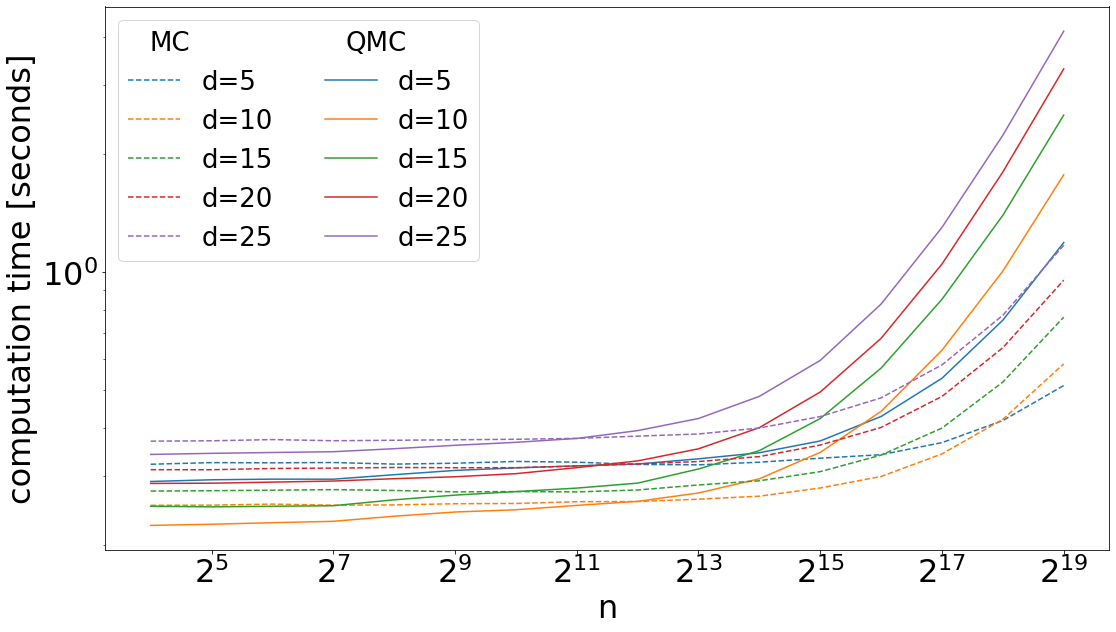

In [25]:
if runall==False:
  cmap = plt.get_cmap("tab10")

  fig, ax = plt.subplots(figsize=(18,10))
  #ax.plot(n, np.mean(times_mc_d5,axis=1), label="d=5", color=adjust_lightness(cmap(0),1.5))
  ax.plot(n, np.mean(times_mc_d5,axis=1), '--', label="d=5", color=cmap(0))
  ax.plot(n, np.mean(times_rqmc_d5,axis=1), label="d=5", color=cmap(0))
  #ax.plot(n, np.mean(times_mc_d10,axis=1), label="d=10", color=adjust_lightness(cmap(1),1.5))
  ax.plot(n, np.mean(times_mc_d10,axis=1), '--',label="d=10", color=cmap(1))
  ax.plot(n, np.mean(times_rqmc_d10,axis=1), label="d=10", color=cmap(1))
  #ax.plot(n, np.mean(times_mc_d15,axis=1), label="d=15", color=adjust_lightness(cmap(2),1.5))
  ax.plot(n, np.mean(times_mc_d15,axis=1), '--',label="d=15", color=cmap(2))
  ax.plot(n, np.mean(times_rqmc_d15,axis=1), label="d=15", color=cmap(2))
  #ax.plot(n, np.mean(times_mc_d20,axis=1), label="d=20", color=adjust_lightness(cmap(3),1.5))
  ax.plot(n, np.mean(times_mc_d20,axis=1), '--', label="d=20", color=cmap(3))
  ax.plot(n, np.mean(times_rqmc_d20,axis=1), label="d=20", color=cmap(3))
  #ax.plot(n, np.mean(times_mc_d25,axis=1), label="d=25", color=adjust_lightness(cmap(4),1.5))
  ax.plot(n, np.mean(times_mc_d25,axis=1), '--', label="d=25", color=cmap(4))
  ax.plot(n, np.mean(times_rqmc_d25,axis=1), label="d=25", color=cmap(4))
  
  #ax.title('d='+str(d))
  ax.set_xscale('log', basex=2)
  ax.set_xlabel('n')
  ax.set_yscale('log', basey=10)
  ax.set_ylabel('computation time [seconds]')
  #plt.legend(loc='upper left', ncol=2,handlelength=1.5,labelspacing=0.3,handletextpad=0.3,columnspacing=1)

  h, l = ax.get_legend_handles_labels()
  ph = [plt.plot([],marker="", ls="")[0]]*2
  handles = ph[:1] + h[::2] + ph[1:] + h[1::2]
  labels = ["MC"] + l[::2] + ["QMC"] + l[1::2]
  #leg = plt.legend(handles, labels, ncol=2,loc='center left', bbox_to_anchor=(1, 0.5))
  leg = plt.legend(handles, labels, ncol=2,loc='upper left')

  for vpack in leg._legend_handle_box.get_children():
    for hpack in vpack.get_children()[:1]:
        hpack.get_children()[0].set_width(0)

  #for line in leg.get_lines():
  #  line.set_linewidth(10)

  plt.savefig('mvgandk_mc_vs_qmc_time.png',bbox_inches = 'tight', pad_inches = .1)
  plt.show()